# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Challenge 1 

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [7]:
# Your code here:

sensor.head(5)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:

sensor.isna().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [8]:
# Your code here:

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [14]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : integer, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/end dates to midnight before generating dat

In [15]:
# Your code here:

time = pd.date_range(start= '1/1/2018 00:00:00', end = '1/1/2018 00:29:10', periods = len(sensor))

Assign the time series index to the dataframe's index.

In [16]:
# Your code here:

sensor.index = time


In [17]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

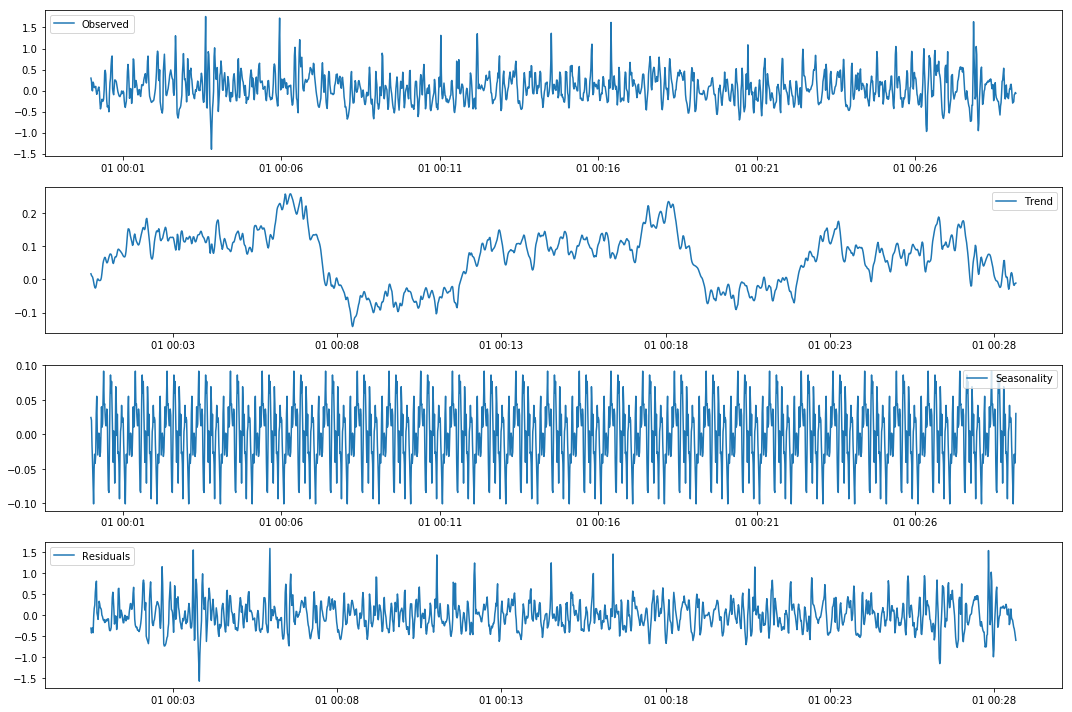

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

Accel_decompose = seasonal_decompose(sensor['userAcceleration.x'], freq = 60)

trend = Accel_decompose.trend
seasonal = Accel_decompose.seasonal
residual = Accel_decompose.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(sensor['userAcceleration.x'], label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

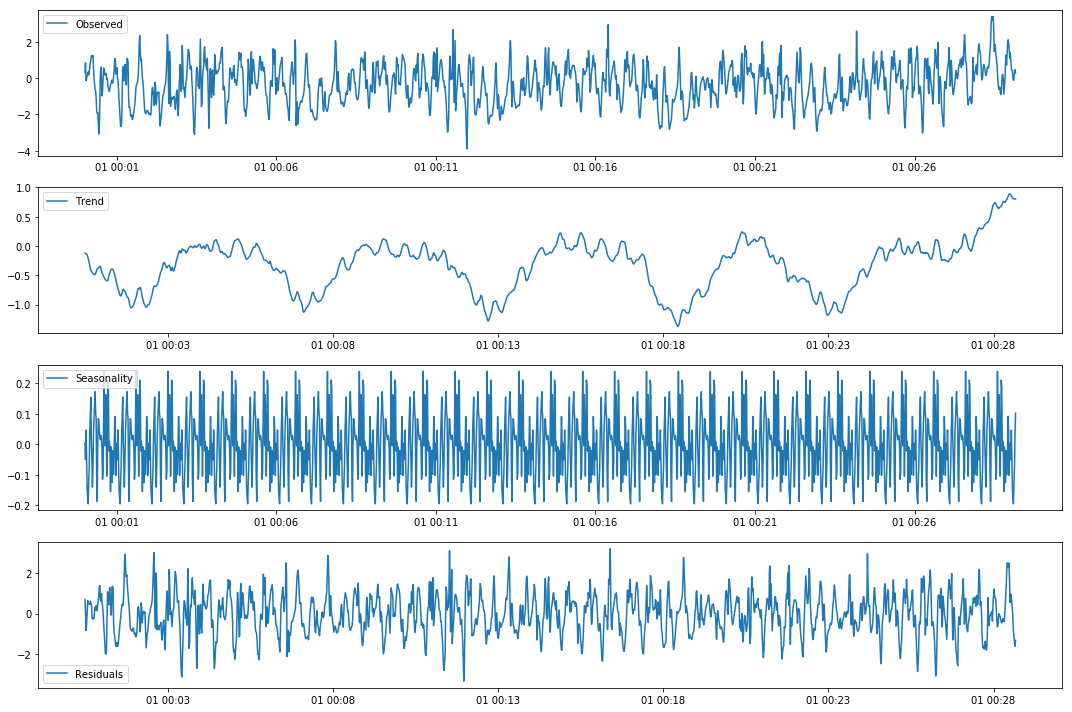

In [29]:
rotation_decompose = seasonal_decompose(sensor['rotationRate.x'], freq = 60)

trend = rotation_decompose.trend
seasonal = rotation_decompose.seasonal
residual = rotation_decompose.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(sensor['rotationRate.x'], label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [37]:
# Your code here:

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    plt.figure(figsize=(15, 8))
    # Determing rolling statistics
    # rolmean = pd.rolling_mean(timeseries, window=12)
    # rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()    
    rolmean = timeseries.rolling(12).mean()


    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)


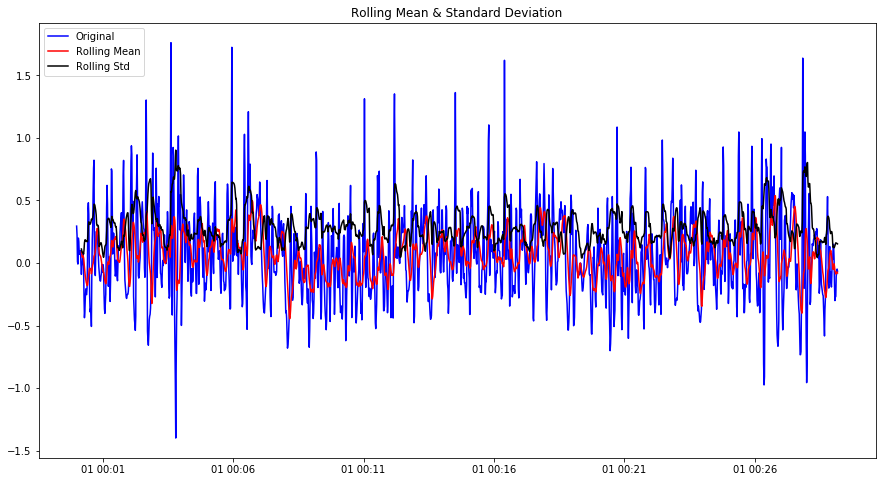

Results of Dickey-Fuller Test:
Test Statistic                -1.795799e+01
p-value                        2.823439e-30
#Lags Used                     4.000000e+00
Number of Observations Used    1.746000e+03
Critical Value (1%)           -3.434101e+00
Critical Value (5%)           -2.863197e+00
Critical Value (10%)          -2.567652e+00
dtype: float64


In [39]:
test_stationarity(sensor['userAcceleration.x'])

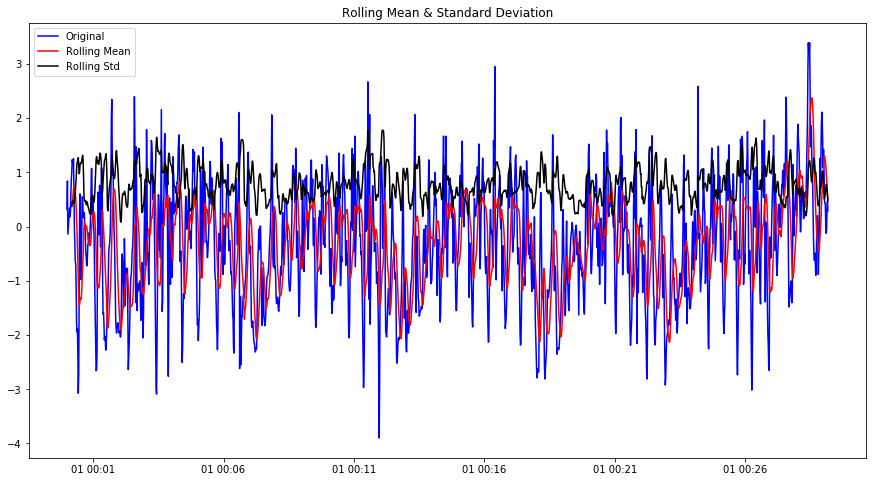

Results of Dickey-Fuller Test:
Test Statistic                   -5.269861
p-value                           0.000006
#Lags Used                       25.000000
Number of Observations Used    1725.000000
Critical Value (1%)              -3.434147
Critical Value (5%)              -2.863217
Critical Value (10%)             -2.567663
dtype: float64


In [40]:
test_stationarity(sensor['rotationRate.x'])

What are your conclusions from this test?

# Your conclusions here:

In both cases, we can see that the time series are stationary, due to the minimum p-value on our Dickey-Fuller test.

This means that its statistical properties (mean, variance, etc.) are constant. This is needed to predict future behaviours on our series: If this measures are constant implies that the series will behave similarly in the future, so it's easier and safer to infer predictions with forecast models such as ARIMA.
